# Regresi Linear - Neural Network Way

![Meme3](./images/meme3.png)

Sumber: https://knowyourmeme.com/photos/1507130-virgin-vs-chad

Untuk mendalami cara kerja model neural network lebih lanjut, maka kita akan mulai dari model yang paling sederhana, yakni model regresi linear dengan menggunakan framework ```keras```.

In [1]:
# load library

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


Selanjutnya kita akan membangkitkan dataset untuk simulasi menggunakan ```numpy```

In [2]:
# membuat seeding
np.random.seed(1000)
nilai_X = np.linspace(-1, 1, 1000)
nilai_Y = 2.5 * nilai_X + np.random.randn(nilai_X.shape[0]) * 0.33 # create a y value which is approximately linear but with some random noise

Berikut merupakan plot dari fungsi diatas.

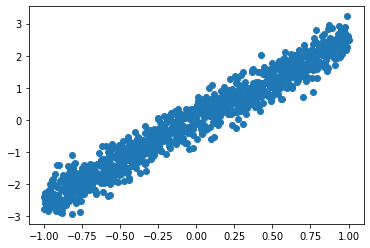

In [3]:
plt.plot(nilai_X, nilai_Y, 'o')
plt.show()

Selanjutnya kita akan membuat model regresi linear menggunakan ```keras```.

In [4]:
model = Sequential()
model.add(Dense(input_dim=1, units=1, kernel_initializer='uniform', activation='linear'))
sgd = SGD(learning_rate=0.01)
model.compile(optimizer=sgd, loss='mse')

## Penjelasan

- Sintaks ```model = Sequential()``` berfungsi untuk inisiasi model *sequential*. Model sequential merupakan model paling dasar yang dapat dibangun oleh ```keras```. Dengan model sequential, kita dapat membuat banyak layer untuk model neural network dengan sangat mudah.

- Sintaks ```model.add()``` berfungsi untuk menambah layer pada model sequential. Kita dapat menambahkan layer dengan jenis yang berbeda sesuai kebutuhan, dalam contoh kali ini kita menggunakan fungsi ```Dense```.

- Sintaks ```Dense``` berfungsi untuk menambah layer yang terdiri dari n input dan m output/units. Dalam contoh kali ini kita hanya memasukkan input_dim=1 karena model hanya terdiri dari 1 variabel input saja, sedangkan units=1 dikarenakan kita hanya menghasilkan 1 output saja. ```kernel_initializer``` berfungsi untuk inisiasi nilai weight pada layer ini, pada contoh kali ini kita menggunakan distribusi uniform untuk membangkitkan nilai weight. ```kernel_initializer``` lainnya dapat dilihat di https://keras.io/initializers/. Selanjutnya ```activation``` berfungsi untuk menentukan fungsi aktivasi yang dipakai, dalam hal ini kita menggunakan ```linear```. Beberapa fungsi aktivasi yang dapat dipilih dapat dilihat di https://keras.io/activations/.

- Sintaks ```SGD``` berfungsi untuk membuat *stochastic gradient descent optimizers* yang digunakan untuk optimasi model neural network. Optimizer lainnya dapat dilihat di https://keras.io/optimizers/.

- sintaks ```model.compile``` berfungsi untuk membuat model menjadi siap pakai untuk pemodelan dengan menentukan ```optimizer``` dan ```loss``` yang digunakan. Pada model ini kita menggunakan ```sgd``` sebagai optimizer yaitu metode *stochastic gradient descent*, sedangkan untuk menghitung loss atau error kita menggunakan ```mse``` atau *mean-squared error*.

---

## Stochastic Gradient Descent

Stochastic Gradient Descent adalah salah satu metode pencarian solusi optimal yang menggunakan konsep gradient untuk mencari solusi. Biasanya, solusi dapat dicari hanya dengan metode gradient descent, yaitu dengan memilih titik awal $w_0$, lalu menghitung arah dengan cara menghitung nilai gradient pada titik tersebut.

![Gradient Descent](./images/gradient-descent.jpeg)

Sumber: http://shivammehta.me/blog/category/mathematics/linear-algebra/

Kecepatan learning dari model neural network juga bergantung pada seberapa besar learning rate yang digunakan dalam model. Semakin kecil nilai learning rate maka semakin lama pula model memperoleh solusi optimal, namun hasilnya kemungkinan besar optimal, ketimbang dengan menggunakan learning rate yang besar.

![Learning Rate](./images/learning_rate.jpg)

Sumber: https://medium.com/@montjoile/an-introduction-to-gradient-descent-algorithm-34cf3cee752b

Untuk data yang jumlahnya tidak terlalu banyak, tidak akan terlalu menjadi masalah karena pencarian solusinya cukup cepat hanya dengan mengandalkan gradient descent, namun jika data yang diolah terlalu besar, maka perlu metode lain yang digunakan untuk pencarian solusi optimal, yakni dengan hanya mengambil 1 contoh dari sekian banyak untuk dilatih per iterasinya yang disebut sebagai metode *stochastic gradient descent*.

![Gradient vs Stochastic](./images/gradient_vs_stochastic.png)

Sumber: https://engmrk.com/mini-batch-gd/


## Global Optima vs Local Optima

Solusi dari suatu fungsi terkadang tidak hanya 1, tapi bisa jadi lebih. Hal ini bisa jadi dikarenakan dimensi dari data yang begitu besar atau inkonsistensi pada data dan sebab lainnya. 

![Local vs Global Optima](./images/local_vs_global.png)

Mengapa kita perlu tahu apa itu local dan global optima? Karena solusi yang diperoleh oleh model neural network yang dibuat belum tentu optimal, apalagi jika terdapat banyak sekali local optima pada data sehingga pencarian solusi global menjadi sangat sulit. Hal ini juga yang menyebabkan penentuan pencari solusi optimal dan learning rate menjadi sangat penting.

---

**Model Fitting**

In [5]:
model.fit(nilai_X, nilai_Y, epochs=100)

Epoch 1/100
1000/1000 [==============================] - 0s 212us/step - loss: 1.8218
Epoch 2/100
1000/1000 [==============================] - 0s 68us/step - loss: 1.2165
Epoch 3/100
1000/1000 [==============================] - 0s 67us/step - loss: 0.8268
Epoch 4/100
1000/1000 [==============================] - 0s 70us/step - loss: 0.5749
Epoch 5/100
1000/1000 [==============================] - 0s 76us/step - loss: 0.4108
Epoch 6/100
1000/1000 [==============================] - 0s 90us/step - loss: 0.3069
Epoch 7/100
1000/1000 [==============================] - 0s 119us/step - loss: 0.2372
Epoch 8/100
1000/1000 [==============================] - 0s 110us/step - loss: 0.1925
Epoch 9/100
1000/1000 [==============================] - 0s 99us/step - loss: 0.1631
Epoch 10/100
1000/1000 [==============================] - 0s 89us/step - loss: 0.1441
Epoch 11/100
1000/1000 [==============================] - 0s 76us/step - loss: 0.1319
Epoch 12/100
1000/1000 [==============================] - 0s

1000/1000 [==============================] - 0s 54us/step - loss: 0.1088
Epoch 97/100
1000/1000 [==============================] - 0s 52us/step - loss: 0.1088
Epoch 98/100
1000/1000 [==============================] - 0s 51us/step - loss: 0.1088
Epoch 99/100
1000/1000 [==============================] - 0s 47us/step - loss: 0.1088
Epoch 100/100
1000/1000 [==============================] - 0s 52us/step - loss: 0.1088


## Backpropagation

Model diatas bekerja dengan cara melakukan propagasi balik atau yang biasa disebut juga sebagai backpropagation. Proses ini terdiri dari dua proses: forward-pass dan backward-pass.

Cara kerja dari proses backpropagation dapat dilihat pada ilustrasi berikut ini:

![Backprop](./images/backprop2.gif)

Sumber: https://mc.ai/introduction-to-neural-networks%E2%80%8A-%E2%80%8Apart-2/

---

Melihat nilai weight.

In [6]:
weights = model.layers[0].get_weights()
w = weights[0][0][0]
b = weights[1][0]

print("Diperoleh nilai weight dari model w: %.5f,  sedangkan nilai biasnya b: %.5f" %(w,b))

Diperoleh nilai weight dari model w: 2.51223,  sedangkan nilai biasnya b: -0.00494


Selanjutnya kita coba membuat nilai prediksi dari ```nilai_X```.

In [7]:
nilai_Y_baru = model.predict(nilai_X)
nilai_Y_baru = nilai_Y_baru.reshape(nilai_Y.shape[0],)

Selanjutnya melakukan plotting untuk nilai_Y dan nilai_Y_baru hasil prediksi dari model.

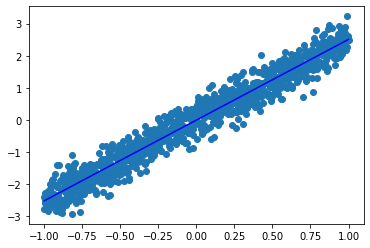

In [8]:
plt.plot(nilai_X, nilai_Y, 'o')
plt.plot(nilai_X, nilai_Y_baru, '-b')
plt.show()

# Latihan

Gunakan data dari House Price (https://www.kaggle.com/c/house-prices-advanced-regression-techniques) yang pernah digunakan sebelumnya, gunakan model perceptron untuk mendapat hasil prediksinya lalu submit hasilnya.